<h1 style="color:white;background-color:black;text-align:center;font-size:350%;font-family:monotype corsiva">Karan Agrawal</h1><h2 style="color:white;background-color:black;text-align:center;font-size:250%;font-family:monotype corsiva">Missing Migrants Solutions</h2>

#### import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### read csv file

In [2]:
df=pd.read_csv("Data\\MissingMigrantsGlobal.csv",encoding="latin1",sep='\t')

In [3]:
df

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvac?k district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,39207,US-Mexico Border,"January 16, 2014",2014,Jan,1.0,NaN,1,NaN,NaN,1.0,NaN,Shot,"near Douglas, Arizona",Ministry of Foreign Affairs Mexico,"31.344700000000, -109.545000000000",Central America to US,http://bit.ly/1qfIw00,Northern America,5
5329,39368,Europe,"January 16, 2014",2014,Jan,1.0,0.0,1,2.0,NaN,1.0,NaN,Hyperthermia,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.155100000000, 27.858600000000",NaN,http://bit.ly/1rTFTjR,Northern Europe,1
5330,39257,US-Mexico Border,"January 14, 2014",2014,Jan,1.0,NaN,1,NaN,NaN,NaN,NaN,Unknown (skeletal remains),Pima County,Pima County Office of the Medical Examiner,"32.058118300000, -111.623576100000",Central America to US,NaN,Northern America,5
5331,39256,US-Mexico Border,"January 12, 2014",2014,Jan,1.0,NaN,1,NaN,NaN,NaN,NaN,Unknown (skeletal remains),Pima County,Pima County Office of the Medical Examiner,"32.058118300000, -111.623576100000",Central America to US,NaN,Northern America,5


In [4]:
df.dtypes

Web ID                                   int64
Region of Incident                      object
Reported Date                           object
Reported Year                            int64
Reported Month                          object
Number Dead                            float64
Minimum Estimated Number of Missing    float64
Total Dead and Missing                   int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Cause of Death                          object
Location Description                    object
Information Source                      object
Location Coordinates                    object
Migration Route                         object
URL                                     object
UNSD Geographical Grouping              object
Source Quality                           int64
dtype: object

## 1.	What are the Top 10 Region of Incidents with higher incidents?

In [5]:
m=df["Region of Incident"].value_counts()

In [6]:
m

US-Mexico Border      1337
North Africa          1239
Mediterranean          984
Sub-Saharan Africa     475
Central America        309
Europe                 249
Horn of Africa         235
Middle East            164
South Asia             151
Southeast Asia          96
Caribbean               59
South America           28
East Asia                5
North America            1
Central Asia             1
Name: Region of Incident, dtype: int64

### So top 10 Reasons are:

In [7]:
m[:10]

US-Mexico Border      1337
North Africa          1239
Mediterranean          984
Sub-Saharan Africa     475
Central America        309
Europe                 249
Horn of Africa         235
Middle East            164
South Asia             151
Southeast Asia          96
Name: Region of Incident, dtype: int64

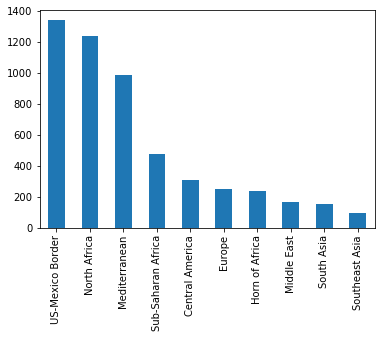

In [8]:
m[:10].plot(kind="bar")
plt.show()

## 2.	What is the Percentage of missing Females, Males and Children in top 10 regions of incidents?

In [9]:
m=df.groupby("Region of Incident")[["Number of Males","Number of Females","Number of Children"]].sum()

In [10]:
m["Total"]=m["Number of Males"]+m["Number of Females"]+m["Number of Children"]

In [11]:
m

,Number of Males,Number of Females,Number of Children,Total
Region of Incident,,,,
Caribbean,80.0,38.0,5.0,123.0
Central America,320.0,39.0,48.0,407.0
Central Asia,0.0,0.0,0.0,0.0
East Asia,3.0,1.0,0.0,4.0
Europe,275.0,35.0,39.0,349.0
Horn of Africa,236.0,70.0,44.0,350.0
Mediterranean,1898.0,811.0,670.0,3379.0
Middle East,142.0,60.0,73.0,275.0
North Africa,597.0,265.0,144.0,1006.0


In [12]:
m.sort_values("Total",inplace=True,ascending=False)

In [13]:
m_top=m[:10]

In [14]:
m_top["Male Percentages"]=(m_top["Number of Males"]/m_top["Total"])*100
m_top["Female Percentages"]=(m_top["Number of Females"]/m_top["Total"])*100
m_top["Children Percentages"]=(m_top["Number of Children"]/m_top["Total"])*100

C:\Users\karan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\karan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\karan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [15]:
m_top

,Number of Males,Number of Females,Number of Children,Total,Male Percentages,Female Percentages,Children Percentages
Region of Incident,,,,,,,
Mediterranean,1898.0,811.0,670.0,3379.0,56.170465,24.001184,19.828352
US-Mexico Border,989.0,97.0,26.0,1112.0,88.938849,8.723022,2.338129
North Africa,597.0,265.0,144.0,1006.0,59.343936,26.341948,14.314115
Sub-Saharan Africa,446.0,207.0,148.0,801.0,55.680400,25.842697,18.476904
Southeast Asia,132.0,150.0,363.0,645.0,20.465116,23.255814,56.279070
Central America,320.0,39.0,48.0,407.0,78.624079,9.582310,11.793612
Horn of Africa,236.0,70.0,44.0,350.0,67.428571,20.000000,12.571429
Europe,275.0,35.0,39.0,349.0,78.796562,10.028653,11.174785
Middle East,142.0,60.0,73.0,275.0,51.636364,21.818182,26.545455


In [16]:
m_per=m_top[["Male Percentages","Female Percentages","Children Percentages"]]

### Percentage of Missing Males and Females

In [17]:
m_per

,Male Percentages,Female Percentages,Children Percentages
Region of Incident,,,
Mediterranean,56.170465,24.001184,19.828352
US-Mexico Border,88.938849,8.723022,2.338129
North Africa,59.343936,26.341948,14.314115
Sub-Saharan Africa,55.680400,25.842697,18.476904
Southeast Asia,20.465116,23.255814,56.279070
Central America,78.624079,9.582310,11.793612
Horn of Africa,67.428571,20.000000,12.571429
Europe,78.796562,10.028653,11.174785
Middle East,51.636364,21.818182,26.545455


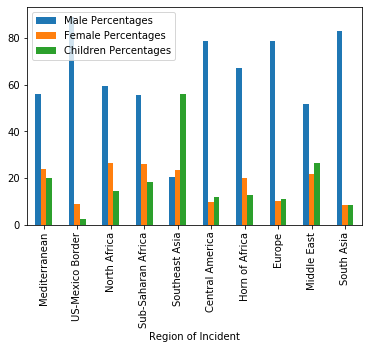

In [18]:
m_per.plot(kind="bar")
plt.show()

## 3.	List most common Information Source according to region of incident wise

In [28]:
df[["Information Source","Region of Incident"]].groupby("Region of Incident").max()

,Information Source
Region of Incident,
Caribbean,Yahoo! News
Central America,vTV
Central Asia,"Reuters, EurasiaNet, Asia News"
East Asia,"Taiwan Coast Guard Administration, VN Express,..."
Europe,id Border Police via IOM Serbia
Horn of Africa,UNHCR
Mediterranean,ubAlert
Middle East,"UNHCR, The National, The Daily Star Lebanon, A..."
North Africa,"Watch the Med Alarm Phone, Association Marocai..."


## 4.	What are the most common causes of death in every region?

In [30]:
df[["Cause of Death","Region of Incident"]].groupby("Region of Incident").max()

,Cause of Death
Region of Incident,
Caribbean,Vehicle Accident
Central America,Violence
Central Asia,Bus fire
East Asia,Presumed drowning
Europe,Violence
Horn of Africa,"Vehicle Accident, Shot or stabbed"
Mediterranean,"Violence, Asphyxiation, Drowning"
Middle East,Violence
North Africa,Violence


## 5.	 List number of cases reported month wise in year 2019 ?

In [133]:
m=df[df["Reported Year"]==2019]

### Number of Cases Month Wise

In [136]:
m["Reported Month"].value_counts()

Jan    57
Feb    51
Mar    35
Name: Reported Month, dtype: int64

## 6.	What are the top migration routes

In [139]:
x=df["Migration Route"].value_counts()

### Top 10 Migration routes are

In [142]:
x[0:10]

Central America to US       1507
Central Mediterranean        499
Western Mediterranean        255
Eastern Mediterranean        230
Western Balkans               64
Calais to United Kingdom      51
Horn Africa to Yemen          15
Western African               15
Italy to France                9
Darien Gap                     7
Name: Migration Route, dtype: int64

## 7.	List number of cases reported yearwise and compare them

In [145]:
x=df["Reported Year"].value_counts()

### Number of Cases by year

In [146]:
x

2018    1506
2017    1356
2016    1275
2015     808
2014     245
2019     143
Name: Reported Year, dtype: int64

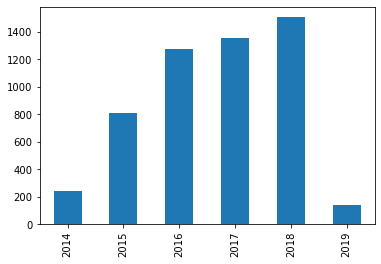

In [147]:
x.sort_index().plot(kind="bar")

#### Cases are increasing linearly and in 2019 we have data of only three month so it is seen low